In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight")

In [8]:
# np.c_[X, -np.ones((len(X), 1))]

array([[ 0.,  0., -1.],
       [ 0.,  1., -1.],
       [ 1.,  0., -1.],
       [ 1.,  1., -1.]])

In [3]:
class Perceptron:
    def __init__(self, eta: float=None, epochs: int=None):
        self.weights = np.random.randn(3) * 1e-4
        is_training = (eta is not None) and (epochs is not None)
        if is_training:
            print(f"Initial weights before traning: \n{self.weights}")
            
        self.eta = eta
        self.epochs = epochs
    
    def _z_outcome(self, inputs, weights):
        return np.dot(inputs, weights)
    
    def activation_function(self, z):
        return np.where(z > 0, 1, 0)
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f"X with bias: \n{X_with_bias}")
        
        for epoch in range(self.epochs):
            print("--"*20)
            print(f"for epoch >> {epoch+1}")
            print("--"*20)
            
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"Predicted value after forward pass: \n{y_hat}")
            
            self.error = self.y - y_hat
            print(f"Error: \n{self.error}")
            
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f"Updated weights after epoch: {epoch+1}/{self.epochs}: \n{self.weights}")
            print("##"*20)
            
    
    def predict(self, X_pred):
        X_pred_with_bias = np.c_[X_pred, -np.ones((len(X_pred), 1))]
        z_pred = self._z_outcome(X_pred_with_bias, self.weights)
        y_outcome = self.activation_function(z_pred)
        
        return y_outcome
    
    def total_loss(self):
        loss = np.sum(self.error)
        print(f"\nTotal loss: {loss}\n")
        return loss
    
    def _create_dir_return_path(self, model_dir, file_name):
        os.makedirs(model_dir, exist_ok=True)
        return os.path.join(model_dir, file_name)
    
    def save(self, file_name, model_dir=None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir, file_name)
            joblib.dump(self, model_file_path)
            print(f"Model is saved in {model_file_path}")
        else:
            model_file_path = self._create_dir_return_path('model', file_name)
            joblib.dump(self, model_file_path)
            print(f"Model is saved in {model_file_path}")
    
    def load(self, filepath):
        print("MOdel is loded \n")
        return joblib.load(filepath)
        

In [4]:
AND = pd.DataFrame({"x1":(0,0,1,1),
                    "x2":(0,1,0,1),
                    "y":(0,0,0,1)})
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [5]:
def X_y_split(df, target_col='y'):
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    return X,y

In [6]:
X,y = X_y_split(AND)
print(f"X:  {X.shape}\ny:  {y.shape}")

X:  (4, 2)
y:  (4,)


In [7]:
ETA = 0.1
EPOCHS = 10

model_and = Perceptron(eta=ETA, epochs=EPOCHS)
model_and.fit(X, y)

_ = model_and.total_loss()

Initial weights before traning: 
[-1.62779374e-05 -1.11255636e-04  7.70192065e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
----------------------------------------
for epoch >> 1
----------------------------------------
Predicted value after forward pass: 
[0 0 0 0]
Error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights after epoch: 1/10: 
[ 0.09998372  0.09988874 -0.09992298]
########################################
----------------------------------------
for epoch >> 2
----------------------------------------
Predicted value after forward pass: 
[1 1 1 1]
Error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
Updated weights after epoch: 2/10: 
[-1.62779374e-05 -1.11255636e-04  2.00077019e-01]
########################################
----------------------------------------
for epoch >> 3
----------------------------------------
Predicted value after forward pass: 
[0 0 0 0]
Error: 
0    0
1    0
2    0
3    1
Name: y, dtype: 

In [8]:
## Save model

model_and.save('and.model')

Model is saved in model\and.model


In [9]:
## load and model

load_and = Perceptron().load('model/and.model')

MOdel is loded 



In [10]:
load_and.predict([[1,0]])

array([0])

In [11]:
OR = pd.DataFrame({"x1":(0,0,1,1), 
                    "x2":(0,1,0,1), 
                    "y":(0,1,1,1)})
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [12]:
X,y = X_y_split(OR)
print(f"X:  {X.shape}\ny:  {y.shape}")

X:  (4, 2)
y:  (4,)


In [13]:
ETA = 0.1
EPOCHS = 10

model_or = Perceptron(eta=ETA, epochs=EPOCHS)
model_or.fit(X, y)

_ = model_or.total_loss()

Initial weights before traning: 
[-2.49881304e-04 -1.16333935e-04  1.87968794e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
----------------------------------------
for epoch >> 1
----------------------------------------
Predicted value after forward pass: 
[0 0 0 0]
Error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
Updated weights after epoch: 1/10: 
[ 0.19975012  0.19988367 -0.2999812 ]
########################################
----------------------------------------
for epoch >> 2
----------------------------------------
Predicted value after forward pass: 
[1 1 1 1]
Error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after epoch: 2/10: 
[ 0.19975012  0.19988367 -0.1999812 ]
########################################
----------------------------------------
for epoch >> 3
----------------------------------------
Predicted value after forward pass: 
[1 1 1 1]
Error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Update

In [14]:
## Save model

model_or.save('or.model')

Model is saved in model\or.model


In [15]:
## load and model

load_or = Perceptron().load('model/or.model')

MOdel is loded 



In [16]:
load_or.predict([[0,0]])

array([0])

In [17]:
XOR = pd.DataFrame({"x1":(0,0,1,1), 
                    "x2":(0,1,0,1), 
                    "y":(0,1,1,0)})
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [18]:
X,y = X_y_split(XOR)
print(f"X:  {X.shape}\ny:  {y.shape}")

X:  (4, 2)
y:  (4,)


In [19]:
ETA = 0.1
EPOCHS = 10

model_xor = Perceptron(eta=ETA, epochs=EPOCHS)
model_xor.fit(X, y)

_ = model_xor.total_loss()

Initial weights before traning: 
[ 3.82775949e-05 -1.03049428e-04 -4.95377582e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
----------------------------------------
for epoch >> 1
----------------------------------------
Predicted value after forward pass: 
[1 0 1 0]
Error: 
0   -1
1    1
2    0
3    0
Name: y, dtype: int64
Updated weights after epoch: 1/10: 
[ 3.82775949e-05  9.98969506e-02 -4.95377582e-05]
########################################
----------------------------------------
for epoch >> 2
----------------------------------------
Predicted value after forward pass: 
[1 1 1 1]
Error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
Updated weights after epoch: 2/10: 
[-9.99617224e-02 -1.03049428e-04  1.99950462e-01]
########################################
----------------------------------------
for epoch >> 3
----------------------------------------
Predicted value after forward pass: 
[0 0 0 0]
Error: 
0    0
1    1
2    1
3    0
Name

In [20]:
## Save model

model_xor.save('xor.model')

Model is saved in model\xor.model


In [21]:
## load and model

model_xor = Perceptron().load('model/xor.model')

MOdel is loded 



In [22]:
model_xor.predict([[0,0]])

array([0])

In [24]:
def save_plot(df, model, filename='plot.png', plot_dir='plots'):
    def _create_base_plot(df):
        df.plot(kind="scatter", x='x1', y="x2", c="y", s=100, cmap='coolwarm')
        plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
        plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10, 8)
    
    def _plot_decision_region(X, y, model, resolution=0.02):
        color = ("cyan","lightgreen")
        cmap = ListedColormap(color)
        
        X = X.values
        x1 = X[:, 0]
        x2 = X[:, 1]
        
        x1_min, x1_max = x1.min()-1, x1.max()+1
        x2_min, x2_max = x2.min()-1, x2.max()+1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution)
                              )
        
        y_hat = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        plt.plot()
        
        X,y =  X_y_split(df)
    
    _create_base_plot(df)
    _plot_decision_region(X, y, model)
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

MOdel is loded 



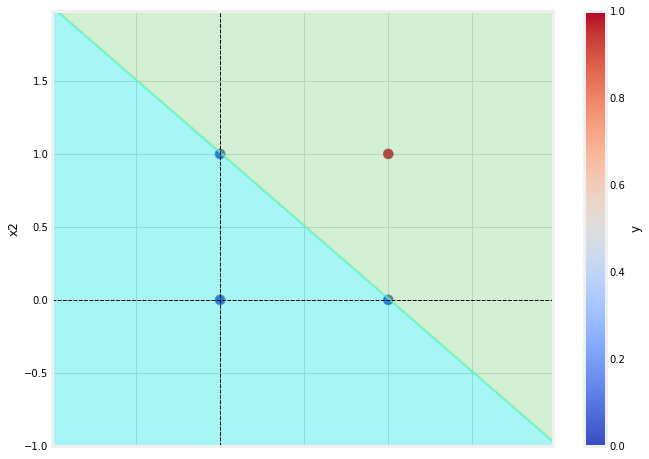

In [30]:
load_and = Perceptron().load('model/and.model')
save_plot(AND, load_and, filename='plot_and.png')

MOdel is loded 



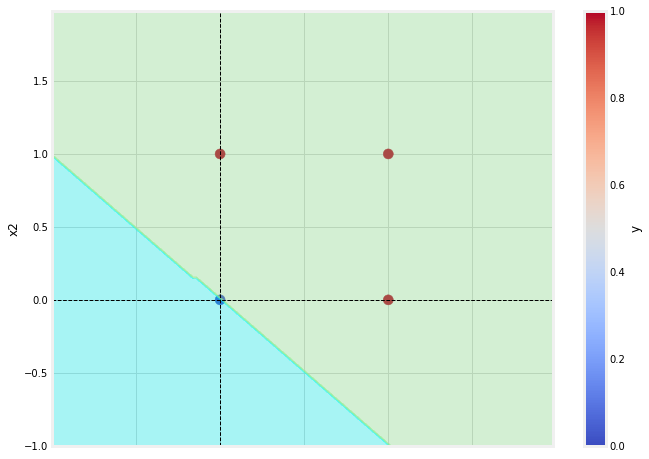

In [29]:
load_or = Perceptron().load('model/or.model')
save_plot(OR, load_or, filename='plot_or.png')

MOdel is loded 



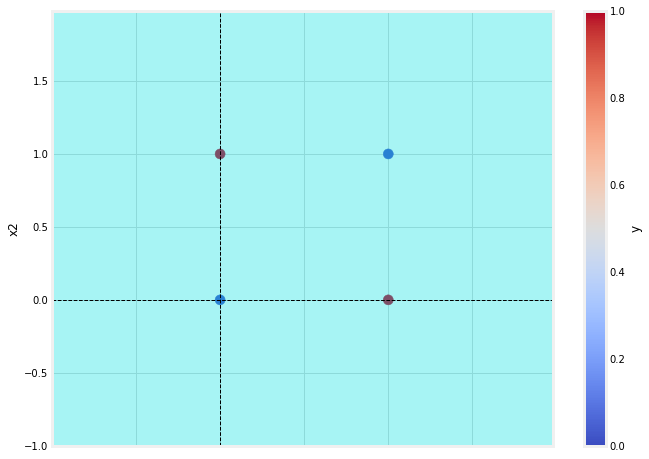

In [28]:
load_xor = Perceptron().load('model/xor.model')
save_plot(XOR, load_xor, filename='plot_xor.png')